In [1]:
import numpy as np
from scipy.ndimage import laplace
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
nx,ny = 30,50 #0.6 x 1.0

u0 = np.zeros((nx,ny))
def dudt(u, t, pos, phi, kappa, gamma, dx):
    du = np.zeros((nx,ny))
    for p in pos:
        du[p[0], p[1]] += phi /dx**2
    u = u.reshape((nx,ny))
    delu = laplace(u, mode='nearest')
    du += kappa * delu / (dx * dx)
    du -= gamma * u
    return du.ravel()

phi = 1
kappa = 1e-9
dx = 1e-2 / ny
t = np.linspace(0, 24 * 60 * 60, 200)

In [3]:
dx

0.0002

In [5]:
import json
f = open('metadata.txt')
s = f.readline()
metadata = json.loads(s)
pos_list = metadata['InitialPositionList']
all_pos = [p['DeviceCoordinatesUm']['TIXYDrive'] for p in pos_list]
all_pos = np.array(all_pos) * 1e-6

pos1 = all_pos[[0,1],:]
pos2 = all_pos[[2,3,4,5,6,7,8],:]
pos3 = all_pos[[9,10,11,12,13],:]
pos4 = all_pos[[14,15,16],:]
pos5 = all_pos[[17,18,19,20,21,22,23,24,25],:]
pos6 = all_pos[[26,27,28,29,30,31],:]
pos7 = all_pos[[32,33,34,35],:]

pos1 = pos1 - pos1.mean(axis=0)
pos1 = pos1 / dx
pos1[:,0] = pos1[:,0] + nx/2
pos1[:,1] = pos1[:,1] + ny/2
pos1 = pos1.astype(int) 

pos2 = pos2 - pos2.mean(axis=0) 
pos2 = pos2 / dx
pos2[:,0] = pos2[:,0] + nx/2
pos2[:,1] = pos2[:,1] + ny/2
pos2 = pos2.astype(int) 

pos3 = pos3 - pos3.mean(axis=0) 
pos3 = pos3 / dx
pos3[:,0] = pos3[:,0] + nx/2
pos3[:,1] = pos3[:,1] + ny/2
pos3 = pos3.astype(int) 

pos4 = pos4 - pos4.mean(axis=0) 
pos4 = pos4 / dx
pos4[:,0] = pos4[:,0] + nx/2
pos4[:,1] = pos4[:,1] + ny/2
pos4 = pos4.astype(int) 

pos5 = pos5 - pos5.mean(axis=0) 
pos5 = pos5 / dx
pos5[:,0] = pos5[:,0] + nx/2
pos5[:,1] = pos5[:,1] + ny/2
pos5 = pos5.astype(int) 

pos6 = pos6 - pos6.mean(axis=0) 
pos6 = pos6 / dx
pos6[:,0] = pos6[:,0] + nx/2
pos6[:,1] = pos6[:,1] + ny/2
pos6 = pos6.astype(int) 

pos7 = pos7 - pos7.mean(axis=0) 
pos7 = pos7 / dx
pos7[:,0] = pos7[:,0] + nx/2
pos7[:,1] = pos7[:,1] + ny/2
pos7 = pos7.astype(int) 

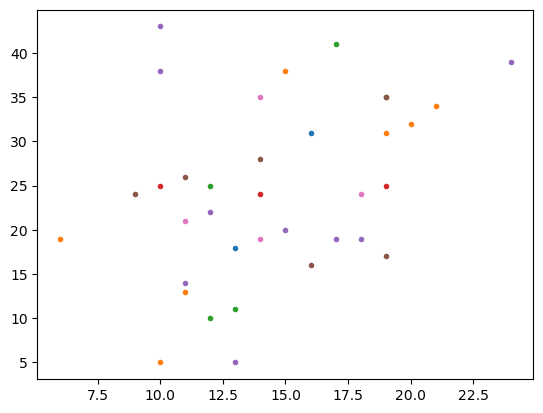

In [6]:
plt.plot(pos1[:,0], pos1[:,1], '.')
plt.plot(pos2[:,0], pos2[:,1], '.')
plt.plot(pos3[:,0], pos3[:,1], '.')
plt.plot(pos4[:,0], pos4[:,1], '.')
plt.plot(pos5[:,0], pos5[:,1], '.')
plt.plot(pos6[:,0], pos6[:,1], '.')
plt.plot(pos7[:,0], pos7[:,1], '.')

In [7]:
#t0_true1 = np.array([390, 371, 332, 259, 262, 252]) * 10 / 60
#t0_true2 = np.array([355, 323, 281]) * 10 / 60
#t0_true3 = np.array([374, 331]) * 10 / 60

t0_true = np.array([[182., 371.],
       [166., 324.],
       [165., 382.],
       [146., 340.],
       [161., 345.],
       [136., 268.],
       [128., 257.],
       [128., 259.],
       [155., 325.],
       [133., 312.],
       [133., 311.],
       [165., 356.],
       [154., 321.],
       [133., 294.],
       [55., 335.],
       [54., 292.],
       [51., 309.],
       [213., 397.],
       [188., 372.],
       [165., 326.],
       [125., 288.],
       [158., 309.],
       [158., 310.],
       [191., 405.],
       [188., 366.],
       [151., 338.],
       [164., 331.],
       [176., 338.],
       [169., 331.],
       [160., 286.],
       [170., 316.],
       [171., 348.],
       [181., 330.],
       [193., 353.],
       [198., 364.],
       [182., 339.]])
t0_true.shape

t0_true1 = t0_true[[0,1],1] * 10 / 60
t0_true2 = t0_true[[2,3,4,5,6,7,8],1] * 10 / 60
t0_true3 = t0_true[[9,10,11,12,13],1] * 10 / 60
t0_true4 = t0_true[[14,15,16],1] * 10 / 60
t0_true5 = t0_true[[17,18,19,20,21,22,23,24,25],1] * 10 / 60
t0_true6 = t0_true[[26,27,28,29,30,31],1] * 10 / 60
t0_true7 = t0_true[[32,33,34,35],1] * 10 / 60

#t0_true1 = t0_true[[0,1],1] * 10 / 60
#t0_true2 = t0_true[[2,4,6,7,8],1] * 10 / 60
#t0_true3 = t0_true[[11,12,13],1] * 10 / 60
#t0_true4 = t0_true[[14,15,16],1] * 10 / 60
#t0_true5 = t0_true[[17,18,19,21,24],1] * 10 / 60
#t0_true6 = t0_true[[29,30,31],1] * 10 / 60
#t0_true7 = t0_true[[32,34,35],1] * 10 / 60

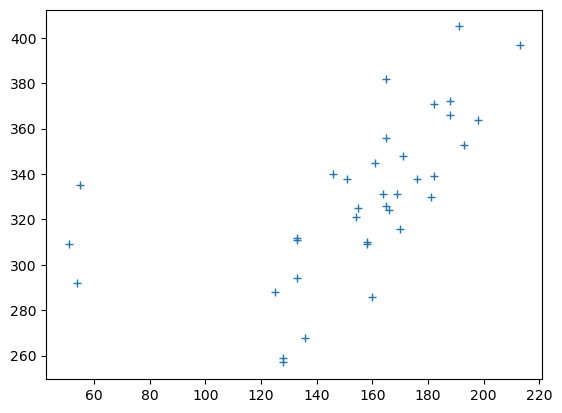

In [8]:
plt.plot(t0_true[:,0], t0_true[:,1], '+')

In [9]:
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

def solve_diffusion(pos, kappa, gamma, dx, dt, ts):
    nt = len(ts)
    print(nt)
    u = np.zeros((nt+1,nx,ny))
    u[0,:,:] = u0
    for ti in range(nt):
        t = int(ts[ti] * dt)
        du = dudt(u[ti,:,:], t, pos, phi, kappa, gamma, dx)
        u[ti+1,:,:] = u[ti,:,:] + dt * du.reshape(nx,ny)
    return u

def arrival_times(pos, phi, kappa, gamma, thresh, plot=False):
    #u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,gamma,dx))
    u = solve_diffusion(pos, kappa, gamma, dx, dt, ts)
    u = u.reshape((len(ts)+1,nx,ny))
    if plot:
        plt.imshow(u[-1,:,:])
        plt.colorbar()
    umax = u.max()
    uthresh = u - thresh
    t0 = np.zeros((0,))
    for p in pos:
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
        if len(zero_crossings)>0:
            s = uthresh[:-1,p[0],p[1]]
            si = interp1d(ts, s)
            sol = root_scalar(si, bracket=(ts[0],ts[-1]))
            tt0 = sol.root
            t0 = np.append(t0, tt0)
        else:
            t0 = np.append(t0, np.nan)

    return t0 * dt / 3600

def u_err(pos, t0, phi, kappa, gamma, thresh, plot=False):
    #u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,gamma,dx))
    u = solve_diffusion(pos, kappa, gamma, dx, dt, ts)
    u = u.reshape((len(ts)+1,nx,ny))
    if plot:
        plt.imshow(u[-1,:,:])
        plt.colorbar()
    uthresh = u - thresh
    uerr = np.zeros_like(t0)
    for i in range(len(t0)):
        tt0 = t0[i] * 60 * 60 / dt
        ti = int(tt0)
        s = uthresh[:,pos[i,0],pos[i,1]]
        si = interp1d(ts, s, kind='cubic')
        tt0 = max(tt0, 0)
        uerr[i] = si(tt0)
    return uerr

In [13]:
phi = 1
kappa = 1e-11
gamma = 0
thresh = 1e11
dt = 30
t = np.linspace(0, 72 * 60 * 60, 200)
ts = np.arange(0, 72 * 60 * 60 / dt)

8640
8640
8640
8640
8640
8640
8640


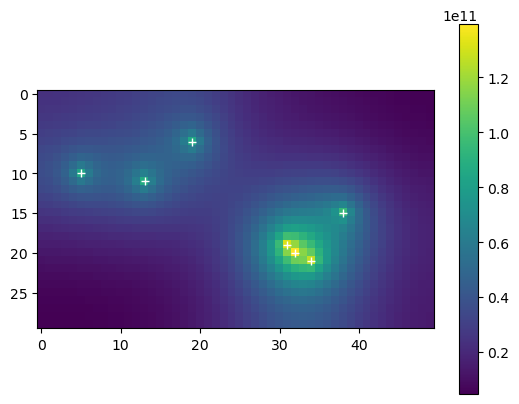

In [14]:
t01 = arrival_times(pos1, phi, kappa, gamma, thresh, plot=False)
t02 = arrival_times(pos2, phi, kappa, gamma, thresh, plot=True)
t03 = arrival_times(pos3, phi, kappa, gamma, thresh, plot=False)
t04 = arrival_times(pos4, phi, kappa, gamma, thresh, plot=False)
t05 = arrival_times(pos5, phi, kappa, gamma, thresh, plot=False)
t06 = arrival_times(pos6, phi, kappa, gamma, thresh, plot=False)
t07 = arrival_times(pos7, phi, kappa, gamma, thresh, plot=False)
plt.plot(pos2[:,1], pos2[:,0], 'w+')

[nan nan]
[        nan         nan         nan         nan         nan 27.94190968
 21.59704829 33.78798217         nan 63.55985638 62.9199553          nan
         nan         nan         nan         nan         nan         nan
 59.1678033  42.81753664 21.54799648 14.78722964 18.29846397         nan
         nan         nan 67.43486722 69.88144001 51.01137079 39.7101507
 52.18942842         nan         nan         nan         nan         nan]
[[ 1. nan]
 [nan nan]]


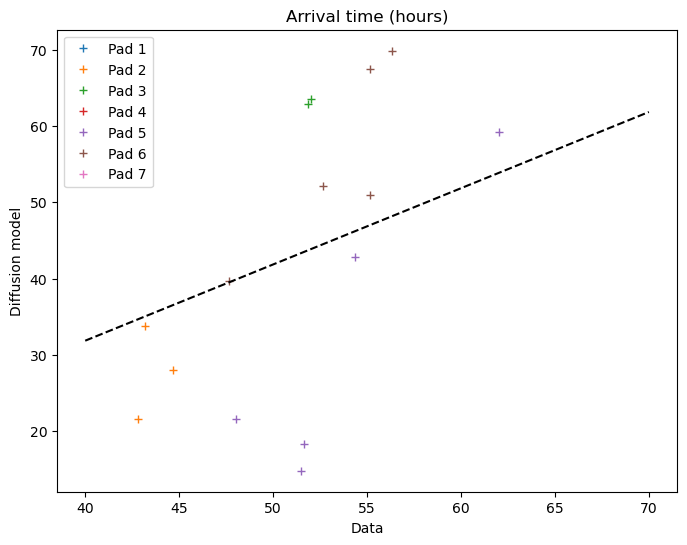

In [15]:
plt.figure(figsize=(8,6))

plt.plot(t0_true1, t01, '+')
plt.plot(t0_true2, t02, '+')
plt.plot(t0_true3, t03, '+')
plt.plot(t0_true4, t04, '+')
plt.plot(t0_true5, t05, '+')
plt.plot(t0_true6, t06, '+')
plt.plot(t0_true7, t07, '+')
x = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true4,t0_true5,t0_true6,t0_true7])
y = np.concatenate([t01,t02,t03,t04,t05,t06,t07])
p = np.polyfit(x, y, deg=1)
print(p)
intercept = np.nanmean(y-x)
plt.plot([40,70], [intercept + 40, intercept + 70], 'k--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Diffusion model')
plt.title('Arrival time (hours)')
print(y)
plt.legend(['Pad 1', 'Pad 2', 'Pad 3', 'Pad 4', 'Pad 5', 'Pad 6', 'Pad 7',])

print(np.corrcoef(x,y))

In [16]:
def residuals(x):
    kappa,thresh = np.exp(x)
    t01 = arrival_times(pos1, phi, kappa, gamma, thresh, plot=False)
    t02 = arrival_times(pos2, phi, kappa, gamma, thresh, plot=False)
    t03 = arrival_times(pos3, phi, kappa, gamma, thresh, plot=False)
    t04 = arrival_times(pos4, phi, kappa, gamma, thresh, plot=False)
    t05 = arrival_times(pos5, phi, kappa, gamma, thresh, plot=False)
    t06 = arrival_times(pos6, phi, kappa, gamma, thresh, plot=False)
    t07 = arrival_times(pos7, phi, kappa, gamma, thresh, plot=False)
    
    xx = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true4,t0_true5,t0_true6,t0_true7])
    yy = np.concatenate([t01,t02,t03,t04,t05,t06,t07])
    offset = np.nanmean(xx-yy)
    print(kappa,thresh, offset)

    resid2 = t02 - t0_true2 + offset
    resid1 = t01 - t0_true1 + offset
    resid3 = t03 - t0_true3 + offset
    resid4 = t04 - t0_true4 + offset
    resid5 = t05 - t0_true5 + offset
    resid6 = t06 - t0_true6 + offset
    resid7 = t07 - t0_true7 + offset

    #resid1 = u_err(pos1, t0_true1 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid2 = u_err(pos2, t0_true2 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid3 = u_err(pos3, t0_true3 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid4 = u_err(pos4, t0_true4 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid5 = u_err(pos5, t0_true5 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid6 = u_err(pos6, t0_true6 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid7 = u_err(pos7, t0_true7 - offset, phi, kappa, gamma, thresh, plot=False)

    resid = np.concatenate([resid1,resid2,resid3,resid4,resid5,resid6,resid7])
    print(x)
    mse = np.mean(resid*resid)
    print(mse)
    #return mse
    return resid

In [18]:
from scipy.optimize import minimize, least_squares, fmin, basinhopping, brute, differential_evolution

lb = np.log([1e-12,1e10])
ub = np.log([1e-9,1e12])
bounds = [lb, ub]
res = least_squares(residuals, np.log([1e-11,1e11]) , bounds=bounds) #, verbose=2, diff_step=[1e-2,1e-3])
res
#res = basinhopping(residuals, np.log([1e-11,2400,40]))
#res = differential_evolution(residuals, bounds=np.log(((1e-12,1e-10),(1e2,1e6),(10,60))))
#xopt = fmin(residuals, np.log([1e-10,1e2]))

8640
8640
8640
8640
8640
8640
8640
9.999999999999985e-12 100000000000.00015 8.156464066783922
[-25.32843602  25.32843602]
nan


ValueError: Residuals are not finite in the initial point.

In [15]:
res

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.637e+00  6.196e+00 ... -3.417e+00  3.585e+00]
           x: [-2.564e+01  7.925e+00]
        cost: 307.0645391008199
         jac: [[ 4.443e+01  4.977e+01]
               [ 4.443e+01  4.977e+01]
               ...
               [ 4.944e+00  7.343e+00]
               [ 4.115e+01  4.639e+01]]
        grad: [ 3.286e-02  3.008e-02]
  optimality: 0.09985123790262397
 active_mask: [0 0]
        nfev: 20
        njev: 17

7.318993713638797e-12 2764.838544546797
8640
8640
8640
8640
8640
8640
8640
7.318993713638797e-12 2764.838544546797 44.69019786980203
[-25.64054827   7.92473752]
17.05914106115666
rmse=4.130271305998755
8640
8640
8640
8640
8640
8640
8640
[  0.51512132 -18.23386756]


array([[1.        , 0.71823788],
       [0.71823788, 1.        ]])

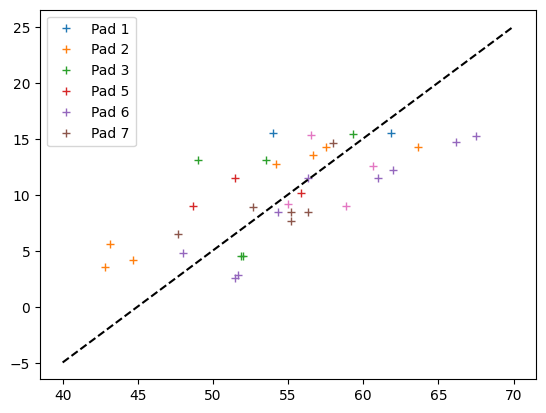

In [16]:
kappa0, thresh0 = np.exp(res.x)
print(kappa0, thresh0)

resid = residuals(np.log([kappa0,thresh0]))
rmse = np.sqrt(np.mean(resid*resid))
print(f'rmse={rmse}')

t01 = arrival_times(pos1, phi, kappa0, gamma, thresh0)
plt.plot(t0_true1, t01, '+')

t02 = arrival_times(pos2, phi, kappa0, gamma, thresh0)
plt.plot(t0_true2, t02, '+')

t03 = arrival_times(pos3, phi, kappa0, gamma, thresh0)
plt.plot(t0_true3, t03, '+')

t04 = arrival_times(pos4, phi, kappa0, gamma, thresh0)
plt.plot(t0_true4, t04, '+')

t05 = arrival_times(pos5, phi, kappa0, gamma, thresh0)
plt.plot(t0_true5, t05, '+')

t06 = arrival_times(pos6, phi, kappa0, gamma, thresh0)
plt.plot(t0_true6, t06, '+')

t07 = arrival_times(pos7, phi, kappa0, gamma, thresh0)
plt.plot(t0_true7, t07, '+')

plt.legend(['Pad 1', 'Pad 2', 'Pad 3', 'Pad 5', 'Pad 6', 'Pad 7',])

x = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true5,t0_true6,t0_true7])
y = np.concatenate([t01,t02,t03,t05,t06,t07])
p = np.polyfit(x, y, deg=1)
print(p)
intercept = np.nanmean(y-x)
plt.plot([40,70], [intercept + 40, intercept + 70], 'k--')

np.corrcoef(x,y)

In [720]:
resid = residuals(np.log([1400,40]))

[7.24422752 3.68887945]
655.147963435267


In [353]:
kappas = [1e-13] # np.logspace(-13,-11,5)
threshs = np.linspace(1000,5000,5)
mses = []
for kappa in kappas:
    for thresh in threshs:
        x = kappa,thresh
        mse = residuals(np.log(x))
        mses.append(mse)

8640
8640
8640
8640
8640
8640
8640
9.999999999999999e-14 999.9999999999998 54.57685185185185
[-29.93360621   6.90775528]
33.75891632373114
8640
8640
8640
8640
8640
8640
8640
9.999999999999999e-14 1999.9999999999998 54.293518518518525
[-29.93360621   7.60090246]
33.75891632373113
8640
8640
8640
8640
8640
8640
8640
9.999999999999999e-14 2999.9999999999977 54.01018518518518
[-29.93360621   8.00636757]
33.75891632373114
8640
8640
8640
8640
8640
8640
8640
9.999999999999999e-14 3999.9999999999995 53.71898148148147
[-29.93360621   8.29404964]
33.755893561385456
8640
8640
8640
8640
8640
8640
8640
9.999999999999999e-14 5000.000000000004 53.43564814814815
[-29.93360621   8.51719319]
33.75589356138546


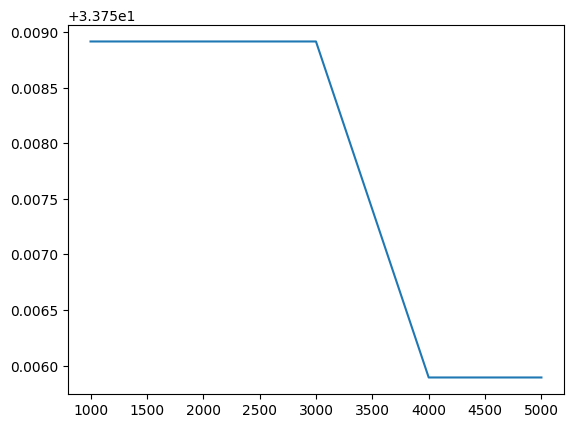

In [354]:
np.array(mses).shape
plt.plot(threshs, mses)

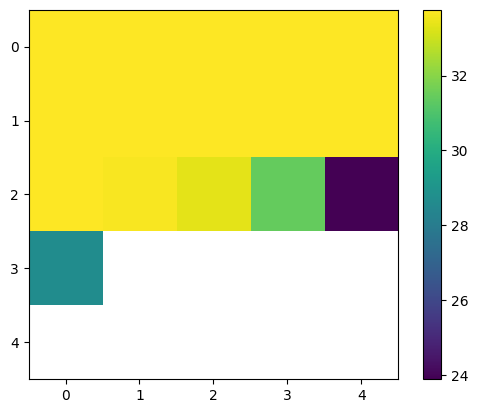

In [351]:
plt.imshow(np.real(np.array(mses).reshape((5,5))))
plt.colorbar()

In [265]:
kappa = 1e-11
threshs = np.linspace(1000,5000,20)
offset = 40
mses = []
for thresh in threshs:
    x = kappa,thresh,offset
    mse = residuals(np.log(x))
    mses.append(mse)

9.999999999999985e-12 999.9999999999998 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   6.90775528   3.68887945]
2262950.176959102
9.999999999999985e-12 1210.5263157894735 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.09881052   3.68887945]
1692679.4628249006
9.999999999999985e-12 1421.0526315789473 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.25915317   3.68887945]
1211051.4079704774
9.999999999999985e-12 1631.578947368421 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.3973035    3.68887945]
818066.0123958334
9.999999999999985e-12 1842.1052631578953 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.51866436   3.68887945]
513723.2761009668
9.999999999999985e-12 2052.631578947368 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.62687795   3.68887945]
298023.19908588036
9.999999999999985e-12 2263.157894736843 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.72451642   3.68887945]
170965.7813505705
9.999999999999985e-12

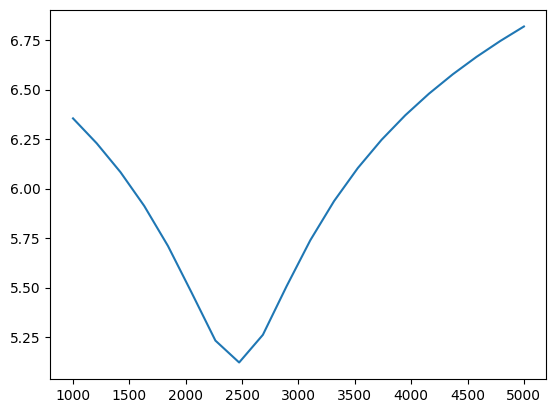

In [266]:
plt.plot(threshs, np.log10(mses))

In [269]:
kappa = 1e-11
thresh = 2500
offsets = np.linspace(20,60,20)
mses = []
for offset in offsets:
    x = kappa,thresh,offset
    mse = residuals(np.log(x))
    mses.append(mse)

9.999999999999985e-12 2499.9999999999995 19.999999999999996
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   2.99573227]
877388.108501148
9.999999999999985e-12 2499.9999999999995 22.10526315789474
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.09581573]
771091.4123164603
9.999999999999985e-12 2499.9999999999995 24.210526315789476
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.18678751]
667818.2064932277
9.999999999999985e-12 2499.9999999999995 26.31578947368421
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.27016912]
568509.0180239896
9.999999999999985e-12 2499.9999999999995 28.421052631578952
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.34713016]
473158.3546379126
9.999999999999985e-12 2499.9999999999995 30.52631578947369
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.41858912]
383306.3969060158
9.999999999999985e-12 2499.9999999999995 32.631578947368425
8640
8640
8640
8640


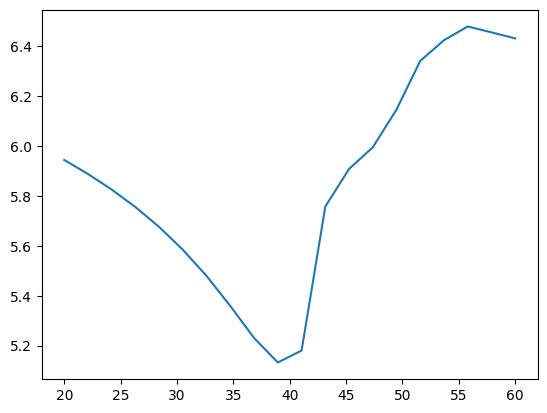

In [270]:
plt.plot(offsets, np.log10(mses))